In [1]:
#Step1 :Import all necessary librabries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import sklearn.linear_model
import sklearn.ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Preprocessing

In [4]:
#Load trainSet and use header to known about trainset
data=pd.read_csv('C:/Users/Gurudeo/Desktop/Personal/BigMart/data.csv')
print(data.head())


  Item_Fat_Content Item_Identifier  Item_MRP  Item_Outlet_Sales  \
0          Low Fat           FDA15  249.8092          3735.1380   
1          Regular           DRC01   48.2692           443.4228   
2          Low Fat           FDN15  141.6180          2097.2700   
3          Regular           FDX07  182.0950           732.3800   
4          Low Fat           NCD19   53.8614           994.7052   

               Item_Type  Item_Visibility  Item_Weight  \
0                  Dairy         0.016047         9.30   
1            Soft Drinks         0.019278         5.92   
2                   Meat         0.016760        17.50   
3  Fruits and Vegetables         0.000000        19.20   
4              Household         0.000000         8.93   

   Outlet_Establishment_Year Outlet_Identifier Outlet_Location_Type  \
0                       1999            OUT049               Tier 1   
1                       2009            OUT018               Tier 3   
2                       1999       

In [5]:
#describe dataset
data.describe()


,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Unnamed: 11
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000,0.0
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681,NaN
std,62.086938,1706.499616,0.051459,4.652502,8.371664,NaN
min,31.290000,33.290000,0.000000,4.555000,1985.000000,NaN
25%,94.012000,834.247400,0.027036,8.710000,1987.000000,NaN
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000,NaN
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000,NaN
max,266.888400,13086.964800,0.328391,21.350000,2009.000000,NaN


In [6]:
#Lets
data.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [7]:
data.Item_Type.value_counts()


Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [8]:
data.Outlet_Size.value_counts()


Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [9]:
data.Outlet_Type.value_counts()


Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [10]:
data.Outlet_Location_Type.value_counts()


Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [11]:
data_Missing=data.isnull().sum()


In [12]:
data_Missing

Item_Fat_Content                 0
Item_Identifier                  0
Item_MRP                         0
Item_Outlet_Sales             5681
Item_Type                        0
Item_Visibility                  0
Item_Weight                   2439
Outlet_Establishment_Year        0
Outlet_Identifier                0
Outlet_Location_Type             0
Outlet_Size                   4016
Outlet_Type                      0
Unnamed: 11                  14204
source                           0
dtype: int64

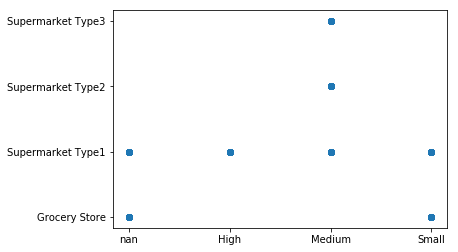

In [13]:
#filling value of Outlet_Size.
#Hypothesis: Outlet_Size depends on Oulet Type and Outlet__Location_Type
plt.scatter(data['Outlet_Size'],data['Outlet_Type'])
plt.show()
#from

In [14]:
twowaytable=pd.crosstab(data['Outlet_Size'],data['Outlet_Type'])
twowaytable

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,1553,0,0
Medium,0,1550,1546,1559
Small,880,3100,0,0


In [15]:
#From above plot and table we can assume that Glacceray shops are of small size
#SO map Glocessary Shop and Size


In [16]:
d={'Grocery Store':'Small'}
s=data.Outlet_Type.map(d)
data.Outlet_Size=data.Outlet_Size.combine_first(s)


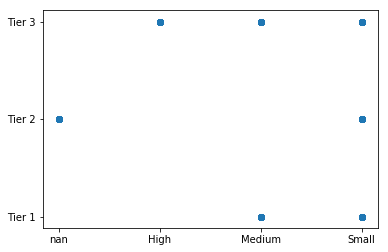

In [17]:
plt.scatter(data['Outlet_Size'],data['Outlet_Location_Type'])
plt.show()


In [18]:
twowaytable=pd.crosstab(data['Outlet_Size'],data['Outlet_Location_Type'])
twowaytable


Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,1553
Medium,1550,0,3105
Small,2430,1550,925


In [19]:
#From plot and table we conclude that Tier 2 is of size small .
#So map Tier 2 and Size


In [20]:
d={'Tier 2':'Small'}
s=data.Outlet_Location_Type.map(d)
data.Outlet_Size=data.Outlet_Size.combine_first(s)


In [21]:
data.Outlet_Size.isnull().any()



False

In [22]:
#Fill missing values of weight of Item According to means of Item Identifier

In [23]:
data['Item_Weight']=data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean'))


In [24]:
data.Item_Weight.isnull().sum()


0

In [25]:
#fill Item_Weigth by theire corresponding Item_Type
List=['Baking Goods','Breads','Breakfast','Canned','Dairy','Frozen Foods','Fruits and Vegetables','Hard Drinks','Health and Hygiene','Household','Meat','Others','Seafood','Snack Foods','Soft Drinks','Starchy Foods']
Mean_values_Item_Type_data=data.groupby('Item_Type')['Item_Weight'].mean()
for i in List:
    d={i:Mean_values_Item_Type_data[i]}
    s=data.Item_Type.map(d)
    data.Item_Weight=data.Item_Weight.combine_first(s)
Mean_values_Item_Type_data=data.groupby('Item_Type')['Item_Weight'].mean()


In [26]:
data.Item_Weight.isnull().any()

False

In [27]:
data.Item_Visibility.value_counts()


0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
0.076975      3
0.077011      3
0.076792      3
0.076483      3
0.046899      2
0.159844      2
0.135708      2
0.135944      2
0.072298      2
0.136008      2
0.136896      2
0.203401      2
0.081788      2
0.075049      2
0.058369      2
0.104784      2
0.080131      2
0.072411      2
0.024635      2
0.052069      2
0.079968      2
0.179192      2
0.079806      2
0.121767      2
0.080625      2
           ... 
0.013147      1
0.098790      1
0.073397      1
0.137756      1
0.017937      1
0.105126      1
0.044156      1
0.141639      1
0.094411      1
0.074883      1
0.039236      1
0.044497      1
0.051147      1
0.175061      1
0.039034      1
0.077508      1
0.078943      1
0.077170      1
0.042959      1
0.013173      1
0.069939      1
0.011305      1
0.069042      1
0.012216      1
0.064142      1
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, L

In [28]:
#From above observations therir are many zeros for item_Visiblity which not possible so 
#fill by corresponding means of Item_Identifiers
data['Item_Visibility'].replace(0.00000,np.nan)#first fill by nam for simplicity
data['Item_Visibility'].fillna(data.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))


0        0.016047
1        0.019278
2        0.016760
3        0.000000
4        0.000000
5        0.000000
6        0.012741
7        0.127470
8        0.016687
9        0.094450
10       0.000000
11       0.045464
12       0.100014
13       0.047257
14       0.068024
15       0.069089
16       0.008596
17       0.069196
18       0.034238
19       0.102492
20       0.138190
21       0.035400
22       0.025698
23       0.057557
24       0.025896
25       0.099887
26       0.066693
27       0.019356
28       0.161467
29       0.072222
           ...   
14174    0.048645
14175    0.087847
14176    0.028977
14177    0.000000
14178    0.099375
14179    0.158425
14180    0.035911
14181    0.037656
14182    0.044073
14183    0.026065
14184    0.000000
14185    0.026234
14186    0.033516
14187    0.045168
14188    0.024110
14189    0.014019
14190    0.045270
14191    0.288892
14192    0.072529
14193    0.037092
14194    0.054463
14195    0.036594
14196    0.094053
14197    0.030704
14198    0

In [29]:
data['Item_Visibility'].fillna(data.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))


0        0.016047
1        0.019278
2        0.016760
3        0.000000
4        0.000000
5        0.000000
6        0.012741
7        0.127470
8        0.016687
9        0.094450
10       0.000000
11       0.045464
12       0.100014
13       0.047257
14       0.068024
15       0.069089
16       0.008596
17       0.069196
18       0.034238
19       0.102492
20       0.138190
21       0.035400
22       0.025698
23       0.057557
24       0.025896
25       0.099887
26       0.066693
27       0.019356
28       0.161467
29       0.072222
           ...   
14174    0.048645
14175    0.087847
14176    0.028977
14177    0.000000
14178    0.099375
14179    0.158425
14180    0.035911
14181    0.037656
14182    0.044073
14183    0.026065
14184    0.000000
14185    0.026234
14186    0.033516
14187    0.045168
14188    0.024110
14189    0.014019
14190    0.045270
14191    0.288892
14192    0.072529
14193    0.037092
14194    0.054463
14195    0.036594
14196    0.094053
14197    0.030704
14198    0

In [30]:
data.Item_Visibility.isnull().any()

False

# Feature Engineering


In [31]:
#Fat_Content showing redudancy of differnt types
data.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [32]:
#Now replace LF by Low Fat ,low fat by lf,reg by Regular
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [33]:
#no of years outlet is working conditon 
data['Outlet_Years']=2018-data['Outlet_Establishment_Year']


In [34]:
Mean_Visibility=data['Item_Visibility'].mean()


In [35]:
data['Item_Visibility_MeanRatio']=data.apply(lambda x:x['Item_Visibility']/Mean_Visibility,axis=1)


In [36]:
#As Item Id and Outlet Id


In [37]:
#Convert categorical into numerical 
var_mod=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']
number=LabelEncoder()


In [38]:
#Item_Identifier and outlet_Identifier are also useful for making prediction
data['Outlet']=number.fit_transform(data['Outlet_Identifier'])
data['Identifier']=number.fit_transform(data['Item_Identifier'])


In [39]:
for i in var_mod:
      data[i]=number.fit_transform(data[i])


In [40]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Unnamed: 11,source,Outlet_Years,Item_Visibility_MeanRatio,Outlet,Identifier
0,0,FDA15,249.8092,3735.1380,4,0.016047,9.30,1999,OUT049,0,1,1,NaN,train,19,0.243315,9,156
1,1,DRC01,48.2692,443.4228,14,0.019278,5.92,2009,OUT018,2,1,2,NaN,train,9,0.292303,3,8
2,0,FDN15,141.6180,2097.2700,10,0.016760,17.50,1999,OUT049,0,1,1,NaN,train,19,0.254122,9,662
3,1,FDX07,182.0950,732.3800,6,0.000000,19.20,1998,OUT010,2,2,0,NaN,train,20,0.000000,0,1121
4,0,NCD19,53.8614,994.7052,9,0.000000,8.93,1987,OUT013,2,0,1,NaN,train,31,0.000000,1,1297


In [41]:
predictors=['Item_Weigth','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Years','Item_Visibility_MeanRatio'
            'Outlet','Identifier']

In [42]:
X=data[data.columns[1:]]
y=data['Item_Outlet_Sales']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


In [57]:
Linear_Model=LinearRegression(normalize=True)